In [80]:
import pandas as pd
from sqlalchemy import create_engine
import tweepy
import matplotlib.pyplot as plt
import numpy as np
from igramscraper.instagram import Instagram

In [ ]:
sql_connection_string = ""
consumer_key = ""
consumer_secret = ""
access_token_key = ""
access_token_secret = ""

# Basic Analysis

## Twitter

In [26]:
#connect to database and getting all fetched usernames as list
df_twitter = pd.read_sql_query("SELECT DISTINCT username FROM twitter",con = create_engine(sql_connection_string))


In [27]:
#connect to twitter api
twitter_keys={
'consumer_key':consumer_key,
'consumer_secret':consumer_secret,
'access_token_key':access_token_key,
'access_token_secret':access_token_secret
}
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'],twitter_keys['access_token_secret'])
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,compression=True)

In [31]:
#creating a loop, to get followercount, tweetcount and description of each person
for i in range(len(df_twitter)):
    user = api.get_user(df_twitter.at[i,'username'])
    follower_count = user.followers_count
    tweets_count = user.statuses_count
    user_description = user.description
    df_twitter.at[i,'follower_count'] = int(follower_count)
    df_twitter.at[i,'tweet_count'] = int(tweets_count)
    df_twitter.at[i,'description'] = user_description
    print("The number of the followers of {0} are   {1}".format(df_twitter.at[i,'username'],follower_count))

The number of the followers of DavidDobrik are   5519791
The number of the followers of JoeBiden are   30612323
The number of the followers of GretaThunberg are   4989742


In [32]:
#show dataframe form previous loop
df_twitter

,username,follower_count,tweet_count,description
0,DavidDobrik,5519791.0,223.0,"Sexy, Gorgeous, and Humble"
1,JoeBiden,30612323.0,7424.0,"Husband to @DrBiden, proud father and grandfat..."
2,GretaThunberg,4989742.0,9788.0,Climate- and environmental activist with Asper...


<ipython-input-78-e02b42938fc5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0,50000,100000,150000,200000,250000,300000])


Text(0.5, 0.98, 'Comparison of number of followers and number of tweets')

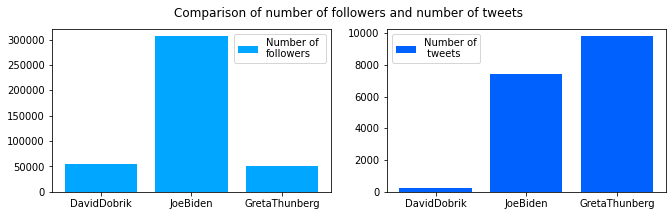

In [78]:
#plotting
labels = list(df_twitter['username'])
follower = list(df_twitter['follower_count'])
tweets = list(df_twitter['tweet_count'])

fig, ax = plt.subplots(1,2,figsize=(11,3),sharey=False)
ax[0].bar(labels,follower,label="""Number of 
followers""",color="#00A6FF")
ax[0].set_yticklabels([0,50000,100000,150000,200000,250000,300000])
ax[0].legend()
ax[1].bar(labels,tweets,label="""Number of
 tweets""",color='#0061FF')
ax[1].legend()
fig.suptitle('Comparison of number of followers and number of tweets')

## Instagram

In [90]:
#connect to scraper
instagram = Instagram()

In [82]:
#getting account information from the three persons
account_david = instagram.get_account("daviddobrik")
account_joe = instagram.get_account("joebiden")
account_greta = instagram.get_account("gretathunberg")

In [96]:
#creating dataframe
data = [[account_david.username,account_david.biography,account_david.followed_by_count,account_david.media_count],[account_joe.username,account_joe.biography,account_joe.followed_by_count,account_joe.media_count],[account_greta.username,account_greta.biography,account_greta.followed_by_count,account_greta.media_count]]
df_instagram = pd.DataFrame(data,columns=['username','description','follower_count','post_count'])
df_instagram

,username,description,follower_count,post_count
0,daviddobrik,"Sexy, Gorgeous, and Humble\nSnapchat & Twitter...",13212587,467
1,joebiden,"Husband to @DrBiden, proud father and grandfat...",17998126,1316
2,gretathunberg,Climate- and environmental activist with Asper...,11520516,730


<ipython-input-102-59cb9c23be68>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0,25000,50000,75000,100000,125000,150000,175000])


Text(0.5, 0.98, 'Comparison of number of followers and number of posts')

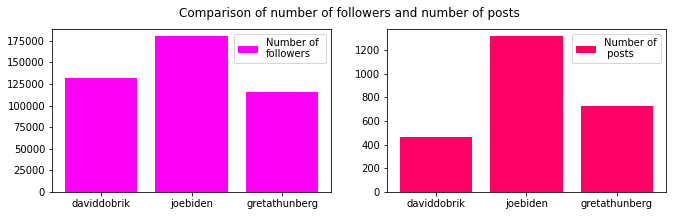

In [102]:
#plotting
labels = list(df_instagram['username'])
follower = list(df_instagram['follower_count'])
posts = list(df_instagram['post_count'])

fig, ax = plt.subplots(1,2,figsize=(11,3),sharey=False)
ax[0].bar(labels,follower,label="""Number of 
followers""",color="#FF00F7")
ax[0].set_yticklabels([0,25000,50000,75000,100000,125000,150000,175000])
ax[0].legend()
ax[1].bar(labels,posts,label="""Number of
 posts""",color='#FF0064')
ax[1].legend()
fig.suptitle('Comparison of number of followers and number of posts')